### stock market prediction using RandomForestClassifier Model

##### Data Preparation

In [3]:
import yfinance as cn

In [4]:
N50 = cn.Ticker("^NSEI")
N50 = N50.history(period="max")
N50 = N50.drop(columns=["Dividends","Stock Splits"])
N50["next day"] = N50["Close"].shift(-1)
N50["Target"] = (N50["next day"] > N50["Close"]).astype(int)

In [5]:
N50 = N50.loc["2013-01-21":].copy() # It is observed here that dataset has only volume data from 21-01-2013

<Axes: xlabel='Date'>

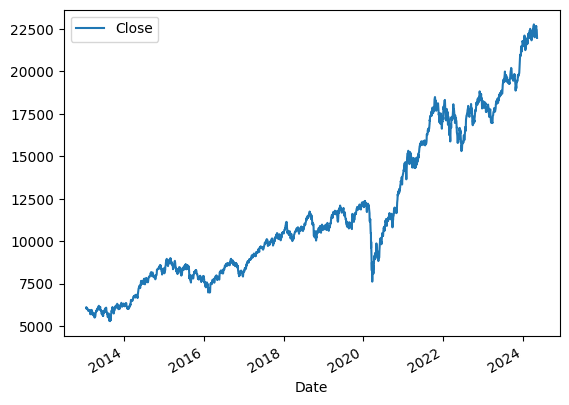

In [6]:
N50.plot.line(y="Close", use_index="True")

In [7]:
N50

,Open,High,Low,Close,Volume,next day,Target
Date,,,,,,,
2013-01-21 00:00:00+05:30,6085.750000,6094.350098,6065.100098,6082.299805,130900,6048.500000,0
2013-01-22 00:00:00+05:30,6080.149902,6101.299805,6040.500000,6048.500000,129000,6054.299805,1
2013-01-23 00:00:00+05:30,6052.850098,6069.799805,6021.149902,6054.299805,137000,6019.350098,0
2013-01-24 00:00:00+05:30,6046.200195,6065.299805,6007.850098,6019.350098,185200,6074.649902,1
2013-01-25 00:00:00+05:30,6024.500000,6080.549805,6014.450195,6074.649902,147600,6074.799805,1
...,...,...,...,...,...,...,...
2024-05-03 00:00:00+05:30,22766.349609,22794.699219,22348.050781,22475.849609,438100,22442.699219,0
2024-05-06 00:00:00+05:30,22561.599609,22588.800781,22409.449219,22442.699219,320300,22302.500000,0
2024-05-07 00:00:00+05:30,22489.750000,22499.050781,22232.050781,22302.500000,297800,22302.500000,0


In [8]:
horizons = [2,5,50,200,750]
new_features = []

for horizon in horizons:
    rolling_averages = N50.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    N50[ratio_column] = N50["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    N50[trend_column] = N50.shift(1).rolling(horizon).sum()["Target"]

    new_features+= [ratio_column, trend_column]

In [9]:
N50 = N50.dropna(subset=N50.columns[N50.columns != "Tomorrow"])

In [10]:
N50.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
next day           0
Target             0
Close_Ratio_2      0
Trend_2            0
Close_Ratio_5      0
Trend_5            0
Close_Ratio_50     0
Trend_50           0
Close_Ratio_200    0
Trend_200          0
Close_Ratio_750    0
Trend_750          0
dtype: int64

In [11]:
N50.rename(columns = {'Close':'close'}, inplace = True)

C:\Users\kvsvy\AppData\Local\Temp\ipykernel_27732\1973573030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N50.rename(columns = {'Close':'close'}, inplace = True)


In [12]:
N50

,Open,High,Low,close,Volume,next day,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_50,Trend_50,Close_Ratio_200,Trend_200,Close_Ratio_750,Trend_750
Date,,,,,,,,,,,,,,,,,
2016-02-18 00:00:00+05:30,7177.399902,7215.100098,7127.850098,7191.750000,246700,7210.750000,1,1.005825,2.0,1.013141,4.0,0.954443,23.0,0.897919,92.0,0.996824,384.0
2016-02-19 00:00:00+05:30,7170.549805,7226.850098,7145.950195,7210.750000,192300,7234.549805,1,1.001319,2.0,1.009283,4.0,0.958213,24.0,0.900837,93.0,0.999243,385.0
2016-02-22 00:00:00+05:30,7208.850098,7252.399902,7200.700195,7234.549805,154400,7109.549805,0,1.001648,2.0,1.010588,4.0,0.962343,25.0,0.904430,93.0,1.002322,385.0
2016-02-23 00:00:00+05:30,7240.299805,7241.700195,7090.700195,7109.549805,194400,7018.700195,0,0.991286,1.0,0.991429,4.0,0.947161,24.0,0.889479,93.0,0.984806,385.0
2016-02-24 00:00:00+05:30,7075.000000,7090.799805,7009.750000,7018.700195,199700,6970.600098,0,0.993570,0.0,0.981216,3.0,0.936534,24.0,0.878705,93.0,0.972052,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-02 00:00:00+05:30,22567.849609,22710.500000,22567.849609,22648.199219,445900,22475.849609,0,1.000958,1.0,1.003138,3.0,1.016792,30.0,1.092008,118.0,1.248008,413.0
2024-05-03 00:00:00+05:30,22766.349609,22794.699219,22348.050781,22475.849609,438100,22442.699219,0,0.996181,1.0,0.996338,2.0,1.008543,29.0,1.082877,118.0,1.237767,413.0
2024-05-06 00:00:00+05:30,22561.599609,22588.800781,22409.449219,22442.699219,320300,22302.500000,0,0.999262,0.0,0.994668,2.0,1.006692,28.0,1.080476,117.0,1.235212,412.0


In [13]:
from rsi_package.rsi_calculator.rsi_calculator import calculate_rsi
rsi_values = calculate_rsi(N50)
N50['RSI'] = round(rsi_values,2)


c:\Users\kvsvy\AppData\Local\Programs\Python\Python312\rsi_package\rsi_calculator\rsi_calculator.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gain'] = df[close_column].diff()
c:\Users\kvsvy\AppData\Local\Programs\Python\Python312\rsi_package\rsi_calculator\rsi_calculator.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gain'] = df['Gain'].apply(lambda x: x if x > 0 else 0)
c:\Users\kvsvy\AppData\Local\Programs\Python\Python312\rsi_package\rsi_calculator\rsi_calculator.py:6: SettingWithCopy

In [14]:
N50.drop(columns=["Gain","Loss","Average Gain","Average Loss","RS"], inplace=True)

C:\Users\kvsvy\AppData\Local\Temp\ipykernel_27732\3684613531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N50.drop(columns=["Gain","Loss","Average Gain","Average Loss","RS"], inplace=True)


In [15]:
N50.dropna(subset=['RSI'],inplace=True)

C:\Users\kvsvy\AppData\Local\Temp\ipykernel_27732\2580396369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N50.dropna(subset=['RSI'],inplace=True)


In [16]:
N50.isnull().sum()

Open               0
High               0
Low                0
close              0
Volume             0
next day           0
Target             0
Close_Ratio_2      0
Trend_2            0
Close_Ratio_5      0
Trend_5            0
Close_Ratio_50     0
Trend_50           0
Close_Ratio_200    0
Trend_200          0
Close_Ratio_750    0
Trend_750          0
RSI                0
dtype: int64

In [17]:
N50.columns

Index(['Open', 'High', 'Low', 'close', 'Volume', 'next day', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_50', 'Trend_50', 'Close_Ratio_200', 'Trend_200',
       'Close_Ratio_750', 'Trend_750', 'RSI'],
      dtype='object')

In [18]:
N50.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2016-03-09 00:00:00+05:30 to 2024-05-08 00:00:00+05:30
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             2009 non-null   float64
 1   High             2009 non-null   float64
 2   Low              2009 non-null   float64
 3   close            2009 non-null   float64
 4   Volume           2009 non-null   int64  
 5   next day         2009 non-null   float64
 6   Target           2009 non-null   int32  
 7   Close_Ratio_2    2009 non-null   float64
 8   Trend_2          2009 non-null   float64
 9   Close_Ratio_5    2009 non-null   float64
 10  Trend_5          2009 non-null   float64
 11  Close_Ratio_50   2009 non-null   float64
 12  Trend_50         2009 non-null   float64
 13  Close_Ratio_200  2009 non-null   float64
 14  Trend_200        2009 non-null   float64
 15  Close_Ratio_750  2009 non-null   float64
 16  Trend_750   

##### Applying Model RandomForestClassifier Iteration No.1

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split= 100,random_state=1)

train = N50.iloc[:-150]
test = N50.iloc[-150:]

predictors = ["close", "Volume", "Open", "High", "Low", "RSI","Trend_2","Close_Ratio_5","Trend_5","Close_Ratio_50","Trend_50","Close_Ratio_200","Trend_200","Close_Ratio_750","Trend_750","RSI"]

model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
PS =precision_score(test["Target"], preds)
# preds
from sklearn.metrics import f1_score

f1= f1_score(test["Target"],preds)

print("F1 Score:", f1)
print("precision_score:", PS)

F1 Score: 0.56
precision_score: 0.5444444444444444


In [21]:
preds.value_counts()

1    90
0    60
Name: count, dtype: int64

<Axes: xlabel='Date'>

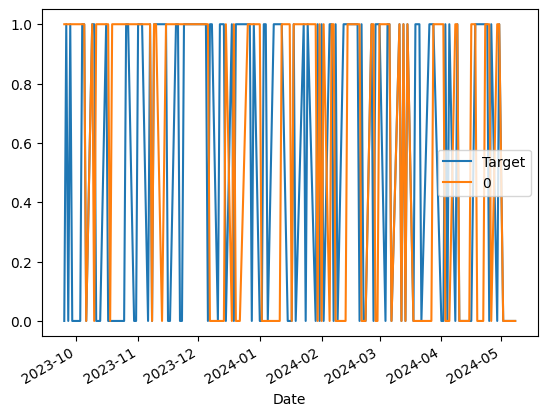

In [22]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
Predictions = pd.Series(preds, index=test.index)

In [25]:
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [26]:
predictions = backtest(N50, model, predictors)

In [27]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.543046357615894
f1_score: 0.48140900195694714


In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model RandomForestClassifier Iteration No.2

In [29]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtest(N50, model, predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0.0    946
1.0     63
Name: count, dtype: int64

In [33]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.6349206349206349
f1_score: 0.12658227848101267


In [34]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

In [35]:
predictions

,Target,Predictions
Date,,
2020-04-09 00:00:00+05:30,0,0.0
2020-04-13 00:00:00+05:30,0,0.0
2020-04-15 00:00:00+05:30,1,0.0
2020-04-16 00:00:00+05:30,1,0.0
2020-04-17 00:00:00+05:30,0,0.0
...,...,...
2024-05-02 00:00:00+05:30,0,0.0
2024-05-03 00:00:00+05:30,0,0.0
2024-05-06 00:00:00+05:30,0,0.0


##### Applying Model RandomForestClassifier using GridSearchCV Iteration No. 3

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [50, 100],
    'random_state': [1]  # Fixed random state for reproducibility
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='precision',  # Use precision as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(train[predictors], train["Target"])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_
best_model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = best_model.predict(test[predictors])

# Compute precision and F1 scores
precision = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("Best Hyperparameters:", best_params)
print("Precision Score:", precision)
print("F1 Score:", f1)

# Define backtesting function
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

# Define prediction function with threshold adjustment
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest with the best model and predictors
predictions = backtest(N50, best_model, predictors)

# Evaluate precision and F1 scores
precision_backtest = precision_score(predictions["Target"], predictions["Predictions"])
f1_backtest = f1_score(predictions["Target"], predictions["Predictions"])

print("Precision Score (Backtest):", precision_backtest)
print("F1 Score (Backtest):", f1_backtest)

Best Hyperparameters: {'min_samples_split': 100, 'n_estimators': 100, 'random_state': 1}
Precision Score: 0.5444444444444444
F1 Score: 0.56
Precision Score (Backtest): 0.5245901639344263
F1 Score (Backtest): 0.10158730158730159


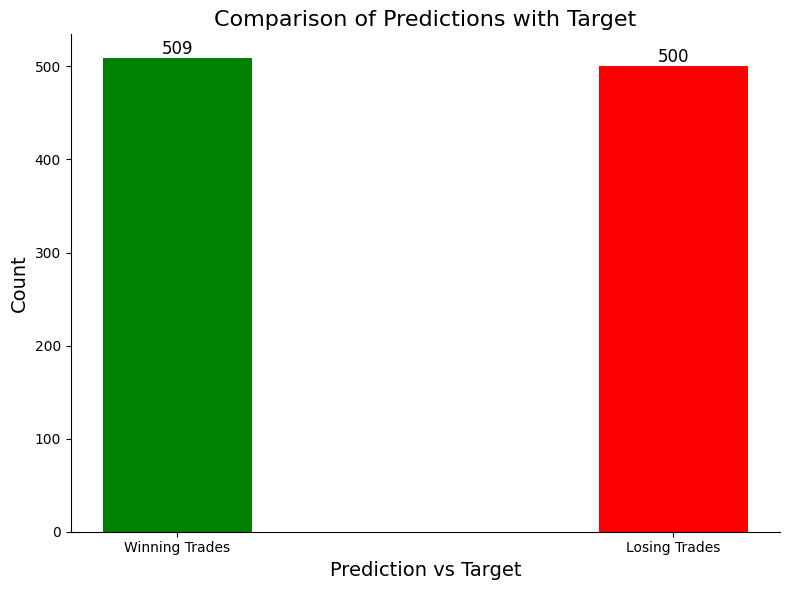

In [184]:
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions['Target'] == predictions['Predictions']).sum()
losing_trades = (predictions['Target'] != predictions['Predictions']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)  # Adjust width here

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


##### Applying Model XGBClassifier Iteration No. 1

In [39]:
from xgboost import XGBClassifier

# Create XGBClassifier model with desired hyperparameters
model = XGBClassifier(n_estimators=100, max_depth=3, random_state=1)

# Split your data into training and test sets
train = N50.iloc[:-150]
test = N50.iloc[-150:]

# Define predictors/features for training
predictors = ["close", "Volume", "Open", "High", "Low","Trend_2","Close_Ratio_5","Trend_5","Close_Ratio_50","Trend_50","Close_Ratio_200","Trend_200","Close_Ratio_750","Trend_750","RSI"]

# Train the XGBClassifier model
model.fit(train[predictors], train["Target"])


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [40]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
PS =precision_score(test["Target"], preds)
# preds
from sklearn.metrics import f1_score

f1= f1_score(test["Target"],preds)

print("F1 Score:", f1)
print("precision_score:", PS)

F1 Score: 0.4246575342465753
precision_score: 0.5081967213114754


In [41]:
preds.value_counts()

0    89
1    61
Name: count, dtype: int64

<Axes: xlabel='Date'>

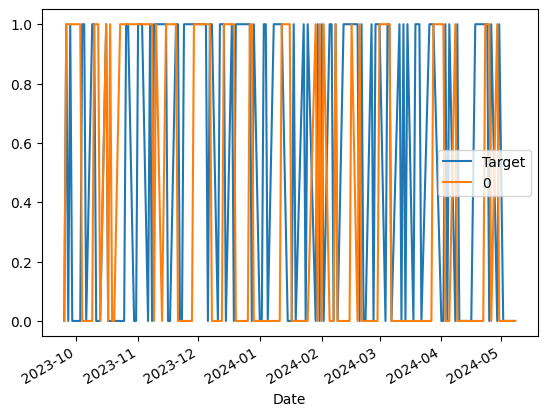

In [42]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [43]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [44]:
Predictions = pd.Series(preds, index=test.index)

In [45]:
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [46]:
predictions = backtest(N50, model, predictors)

In [47]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5259593679458239
f1_score: 0.46047430830039526


In [48]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model XGBClassifier Iteration No. 2

In [53]:
model = XGBClassifier(n_estimators=200, random_state=1)


In [54]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [55]:
predictions = backtest(N50, model, predictors)

In [56]:
predictions["Predictions"].value_counts()

Predictions
0.0    628
1.0    381
Name: count, dtype: int64

In [57]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5328083989501312
f1_score: 0.42736842105263156


In [58]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

In [60]:
predictions

,Target,Predictions
Date,,
2020-04-09 00:00:00+05:30,0,1.0
2020-04-13 00:00:00+05:30,0,1.0
2020-04-15 00:00:00+05:30,1,0.0
2020-04-16 00:00:00+05:30,1,0.0
2020-04-17 00:00:00+05:30,0,0.0
...,...,...
2024-05-02 00:00:00+05:30,0,1.0
2024-05-03 00:00:00+05:30,0,0.0
2024-05-06 00:00:00+05:30,0,0.0


##### Applying Model XGBClassifier using GridSearchCV Iteration No. 3

In [68]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'random_state': [1]  # Fixed random state for reproducibility
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='precision',  # Use precision as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(train[predictors], train["Target"])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_
best_model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = best_model.predict(test[predictors])

# Compute precision and F1 scores
precision = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("Best Hyperparameters:", best_params)
print("Precision Score:", precision)
print("F1 Score:", f1)

# Define backtesting function
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

# Define prediction function with threshold adjustment
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest with the best model and predictors
predictions = backtest(N50, best_model, predictors)

# Evaluate precision and F1 scores
precision_backtest = precision_score(predictions["Target"], predictions["Predictions"])
f1_backtest = f1_score(predictions["Target"], predictions["Predictions"])

print("Precision Score (Backtest):", precision_backtest)
print("F1 Score (Backtest):", f1_backtest)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 1}
Precision Score: 0.5384615384615384
F1 Score: 0.5153374233128835
Precision Score (Backtest): 0.5
F1 Score (Backtest): 0.33760186263096625


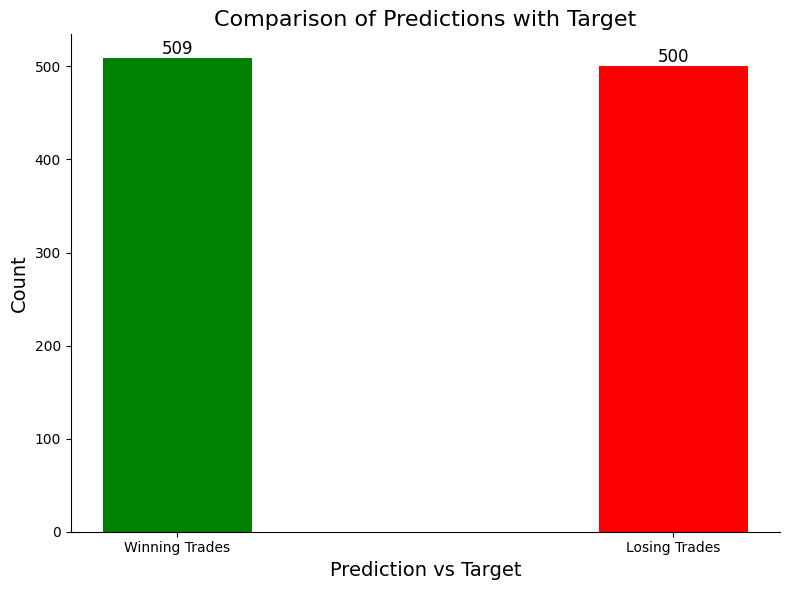

In [185]:
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions['Target'] == predictions['Predictions']).sum()
losing_trades = (predictions['Target'] != predictions['Predictions']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)  # Adjust width here

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


##### Applying Model GradientBoostingClassifier Iteration No. 1

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Create GradientBoostingClassifier model with desired hyperparameters
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=1)

# Split your data into training and test sets
train = N50.iloc[:-150]
test = N50.iloc[-150:]

# Define predictors/features for training
predictors = ["close", "Volume", "Open", "High", "Low", "Trend_2", "Close_Ratio_5", "Trend_5", 
              "Close_Ratio_50", "Trend_50", "Close_Ratio_200", "Trend_200", "Close_Ratio_750", 
              "Trend_750", "RSI"]

# Train the GradientBoostingClassifier model
model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision score and F1 score
PS = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("F1 Score:", f1)
print("Precision Score:", PS)


F1 Score: 0.40298507462686567
Precision Score: 0.5510204081632653


In [72]:
preds.value_counts()

0    101
1     49
Name: count, dtype: int64

<Axes: xlabel='Date'>

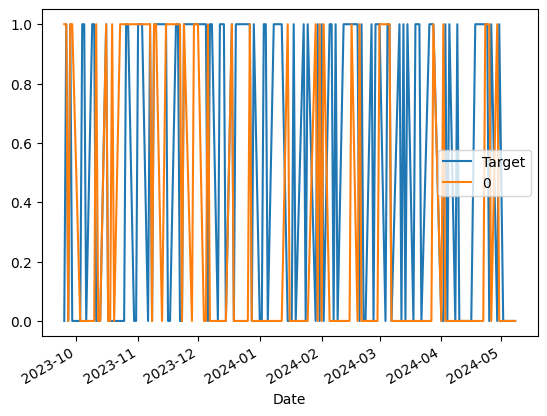

In [73]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [74]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [75]:
Predictions = pd.Series(preds, index=test.index)

In [76]:
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [77]:
predictions = backtest(N50, model, predictors)

In [78]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5543766578249337
f1_score: 0.4418604651162791


In [79]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model GradientBoostingClassifier Iteration No. 2

In [80]:
model = GradientBoostingClassifier(n_estimators=200, random_state=1)


In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [82]:
predictions = backtest(N50, model, predictors)

In [83]:
predictions["Predictions"].value_counts()

Predictions
0.0    765
1.0    244
Name: count, dtype: int64

In [84]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5286885245901639
f1_score: 0.3173431734317343


In [85]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model GradientBoostingClassifier using GridSearchCV Iteration No. 3

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'random_state': [1]  # Fixed random state for reproducibility
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='precision',  # Use precision as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(train[predictors], train["Target"])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_
best_model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = best_model.predict(test[predictors])

# Compute precision and F1 scores
precision = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("Best Hyperparameters:", best_params)
print("Precision Score:", precision)
print("F1 Score:", f1)

# Define backtesting function
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

# Define prediction function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest with the best model and predictors
predictions = backtest(N50, best_model, predictors)

# Evaluate precision and F1 scores
precision_backtest = precision_score(predictions["Target"], predictions["Predictions"])
f1_backtest = f1_score(predictions["Target"], predictions["Predictions"])

print("Precision Score (Backtest):", precision_backtest)
print("F1 Score (Backtest):", f1_backtest)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'random_state': 1}
Precision Score: 0.5826771653543307
F1 Score: 0.6981132075471698
Precision Score (Backtest): 0.5469522240527183
F1 Score (Backtest): 0.564625850340136


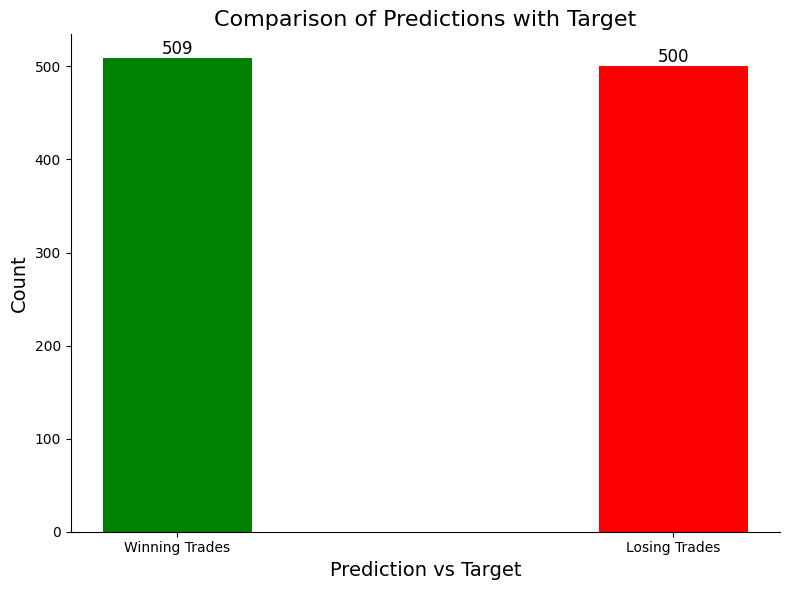

In [186]:
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions['Target'] == predictions['Predictions']).sum()
losing_trades = (predictions['Target'] != predictions['Predictions']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)  # Adjust width here

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


##### Applying Model AdaBoostClassifier Iteration No. 1

In [101]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Create AdaBoostClassifier model with decision trees as base estimator
model = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=1)

# Split your data into training and test sets
train = N50.iloc[:-150]
test = N50.iloc[-150:]

# Define predictors/features for training
predictors = ["close", "Volume", "Open", "High", "Low", "Trend_2", "Close_Ratio_5", "Trend_5", 
              "Close_Ratio_50", "Trend_50", "Close_Ratio_200", "Trend_200", "Close_Ratio_750", 
              "Trend_750", "RSI"]

# Train the AdaBoostClassifier model
model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision score and F1 score for AdaBoost
PS= precision_score(test["Target"], preds_ada)
f1= f1_score(test["Target"], preds_ada)

print("AdaBoost Classifier Results:")
print("F1 Score:", f1_ada)
print("Precision Score:", PS_ada)




AdaBoost Classifier Results:
F1 Score: 0.6981132075471698
Precision Score: 0.5826771653543307


In [102]:
preds_ada.value_counts()


1    127
0     23
Name: count, dtype: int64

<Axes: xlabel='Date'>

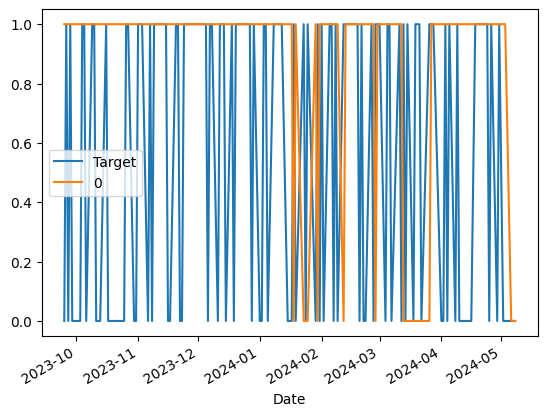

In [103]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [104]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [105]:
Predictions = pd.Series(preds, index=test.index)

In [106]:
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [107]:
predictions = backtest(N50, model, predictors)

In [108]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5430622009569378
f1_score: 0.45997973657548125


In [109]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model AdaBoostClassifier Iteration No. 2

In [110]:
model = AdaBoostClassifier(n_estimators=200, algorithm='SAMME', random_state=1)

In [111]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [112]:
predictions = backtest(N50, model, predictors)

In [113]:
predictions["Predictions"].value_counts()

Predictions
0.0    984
1.0     25
Name: count, dtype: int64

In [114]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.52
f1_score: 0.04377104377104377


In [115]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model AdaBoostClassifier using GridSearchCV Iteration No. 3

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'random_state': [1],  # Fixed random state for reproducibility
    'algorithm': ['SAMME']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='precision',  # Use precision as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(train[predictors], train["Target"])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_
best_model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = best_model.predict(test[predictors])

# Compute precision and F1 scores
precision = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("Best Hyperparameters:", best_params)
print("Precision Score:", precision)
print("F1 Score:", f1)

# Define backtesting function
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

# Define prediction function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest with the best model and predictors
predictions = backtest(N50, best_model, predictors)

# Evaluate precision and F1 scores
precision_backtest = precision_score(predictions["Target"], predictions["Predictions"])
f1_backtest = f1_score(predictions["Target"], predictions["Predictions"])

print("Precision Score (Backtest):", precision_backtest)
print("F1 Score (Backtest):", f1_backtest)


Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 1}
Precision Score: 0.5666666666666667
F1 Score: 0.723404255319149
Precision Score (Backtest): 0.551760939167556
F1 Score (Backtest): 0.6865869853917662


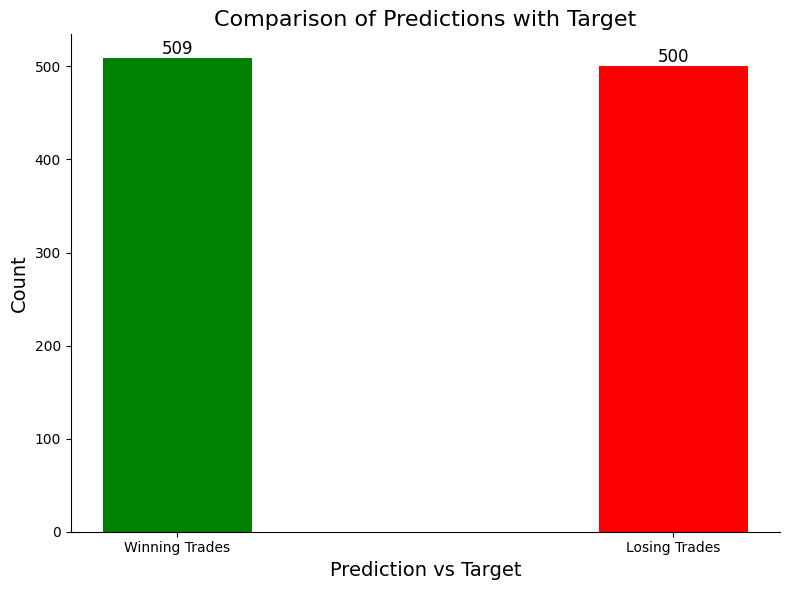

In [187]:
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions['Target'] == predictions['Predictions']).sum()
losing_trades = (predictions['Target'] != predictions['Predictions']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)  # Adjust width here

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


##### Applying Model DecisionTreeClassifier Iteration No. 1

In [122]:
from sklearn.tree import DecisionTreeClassifier

# Create DecisionTreeClassifier model with desired hyperparameters
model = DecisionTreeClassifier(max_depth=3, random_state=1)

# Train the DecisionTreeClassifier model
model.fit(train[predictors], train["Target"])

# Predict using the trained model
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision score
precision = precision_score(test["Target"], preds)

# Calculate F1 score
f1 = f1_score(test["Target"], preds)

# Print the scores
print("F1 Score:", f1)
print("Precision Score:", precision)


F1 Score: 0.6043956043956044
Precision Score: 0.5670103092783505


In [123]:
preds.value_counts()

1    97
0    53
Name: count, dtype: int64

<Axes: xlabel='Date'>

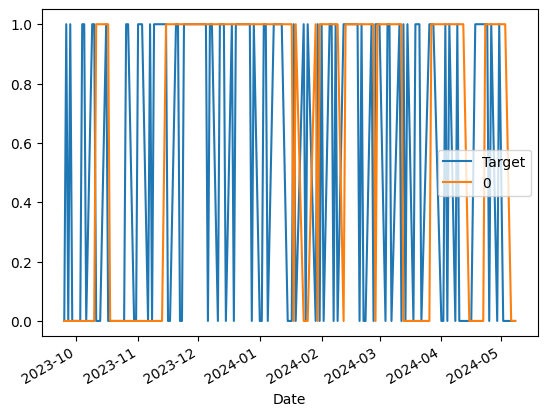

In [124]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [125]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [126]:
Predictions = pd.Series(preds, index=test.index)

In [127]:
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [128]:
predictions = backtest(N50, model, predictors)

In [129]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5706447187928669
f1_score: 0.6409861325115562


In [130]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model DecisionTreeClassifier Iteration No. 2

In [131]:
model = DecisionTreeClassifier(max_depth=4, random_state=1)

In [132]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [133]:
predictions = backtest(N50, model, predictors)

In [134]:
predictions["Predictions"].value_counts()

Predictions
0.0    774
1.0    235
Name: count, dtype: int64

In [135]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.574468085106383
f1_score: 0.3358208955223881


In [136]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model DecisionTreeClassifier using GridSearchCV Iteration No. 3

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 6, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [1]  # Fixed random state for reproducibility
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='precision',  # Use precision as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(train[predictors], train["Target"])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_
best_model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = best_model.predict(test[predictors])

# Compute precision and F1 scores
precision = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("Best Hyperparameters:", best_params)
print("Precision Score:", precision)
print("F1 Score:", f1)

# Define backtesting function
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

# Define prediction function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest with the best model and predictors
predictions = backtest(N50, best_model, predictors)

# Evaluate precision and F1 scores
precision_backtest = precision_score(predictions["Target"], predictions["Predictions"])
f1_backtest = f1_score(predictions["Target"], predictions["Predictions"])

print("Precision Score (Backtest):", precision_backtest)
print("F1 Score (Backtest):", f1_backtest)


Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}
Precision Score: 0.5263157894736842
F1 Score: 0.4968944099378882
Precision Score (Backtest): 0.5837837837837838
F1 Score (Backtest): 0.5765124555160143


In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions['Target'] == predictions['Predictions']).sum()
losing_trades = (predictions['Target'] != predictions['Predictions']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)  # Adjust width here

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


##### Applying Model KNeighborsClassifier Iteration No. 1

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Create KNeighborsClassifier model with desired hyperparameters
model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Split your data into training and test sets
train = N50.iloc[:-150]
test = N50.iloc[-150:]

# Define predictors/features for training
predictors = ["close", "Volume", "Open", "High", "Low", "Trend_2", "Close_Ratio_5", "Trend_5", 
              "Close_Ratio_50", "Trend_50", "Close_Ratio_200", "Trend_200", "Close_Ratio_750", 
              "Trend_750", "RSI"]

# Train the KNeighborsClassifier model
model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision score and F1 score
PS = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("F1 Score:", f1)
print("Precision Score:", PS)


F1 Score: 0.6408839779005525
Precision Score: 0.6041666666666666


In [139]:
preds.value_counts()

1    96
0    54
Name: count, dtype: int64

<Axes: xlabel='Date'>

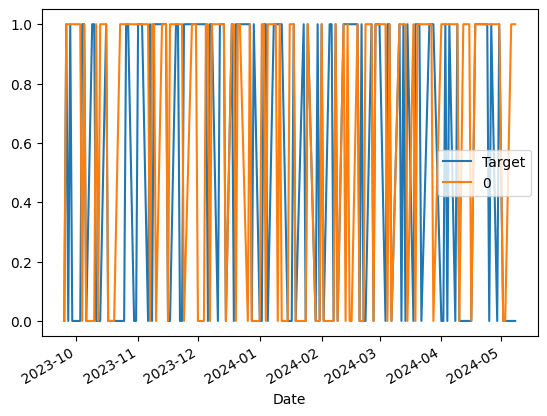

In [140]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [141]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [142]:
Predictions = pd.Series(preds, index=test.index)

In [143]:
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [144]:
predictions = backtest(N50, model, predictors)

In [145]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5620689655172414
f1_score: 0.5674499564838991


In [146]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model KNeighborsClassifier Iteration No. 2

In [163]:
model = KNeighborsClassifier(n_neighbors=10)

In [164]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [165]:
predictions = backtest(N50, model, predictors)

In [166]:
predictions["Predictions"].value_counts()

Predictions
0.0    525
1.0    484
Name: count, dtype: int64

In [167]:
PS =precision_score(predictions["Target"], predictions["Predictions"])
f1 = f1_score(predictions["Target"], predictions["Predictions"])

print("precision_score:", PS)
print("f1_score:", f1)

precision_score: 0.5557851239669421
f1_score: 0.5109211775878443


In [168]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.563925
0    0.436075
Name: count, dtype: float64

##### Applying Model KNeighborsClassifier using GridSearchCV Iteration No. 3

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='precision',  # Use precision as the evaluation metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(train[predictors], train["Target"])

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
best_model = grid_search.best_estimator_
best_model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = best_model.predict(test[predictors])

# Compute precision and F1 scores
precision = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("Best Hyperparameters:", best_params)
print("Precision Score:", precision)
print("F1 Score:", f1)

# Define backtesting function
def backtest(data, model, predictors, start=1000, step=100):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

# Define prediction function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

# Backtest with the best model and predictors
predictions = backtest(N50, best_model, predictors)

# Evaluate precision and F1 scores
precision_backtest = precision_score(predictions["Target"], predictions["Predictions"])
f1_backtest = f1_score(predictions["Target"], predictions["Predictions"])

print("Precision Score (Backtest):", precision_backtest)
print("F1 Score (Backtest):", f1_backtest)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Precision Score: 0.6172839506172839
F1 Score: 0.6024096385542169
Precision Score (Backtest): 0.5664739884393064
F1 Score (Backtest): 0.5404411764705882


In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of winning and losing trades
winning_trades = (predictions['Target'] == predictions['Predictions']).sum()
losing_trades = (predictions['Target'] != predictions['Predictions']).sum()

# Define colors for the bars
colors = ['green', 'red']

# Create bar chart with customized styling
plt.figure(figsize=(8, 6))
bars = plt.bar(['Winning Trades', 'Losing Trades'], [winning_trades, losing_trades], color=colors, width=0.3)  # Adjust width here

# Add counts as text on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Comparison of Predictions with Target', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Prediction vs Target', fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()


##### Applying Model SVC Iteration No. 1

In [171]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, f1_score
import pandas as pd

# Create SVC model with desired hyperparameters
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1)

# Split your data into training and test sets
train = N50.iloc[:-150]
test = N50.iloc[-150:]

# Define predictors/features for training
predictors = ["close", "Volume", "Open", "High", "Low", "Trend_2", "Close_Ratio_5", "Trend_5", 
              "Close_Ratio_50", "Trend_50", "Close_Ratio_200", "Trend_200", "Close_Ratio_750", 
              "Trend_750", "RSI"]

# Train the SVC model
model.fit(train[predictors], train["Target"])

# Make predictions on the test set
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision score and F1 score
PS = precision_score(test["Target"], preds)
f1 = f1_score(test["Target"], preds)

print("F1 Score:", f1)
print("Precision Score:", PS)


F1 Score: 0.723404255319149
Precision Score: 0.5666666666666667


In [172]:
preds.value_counts()

1    150
Name: count, dtype: int64